In [1]:
from diffusers import DiffusionPipeline
from torchvision import transforms
from PIL import Image
import torch
import numpy as np

2023-11-15 11:28:45.098435: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 11:28:45.116220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 11:28:45.116236: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 11:28:45.116251: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 11:28:45.120073: I tensorflow/core/platform/cpu_feature_g

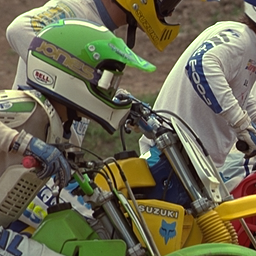

In [2]:
encode_transform = transforms.Compose(
    [
        # transforms.Resize(256, interpolation=transforms.InterpolationMode.BILINEAR),
        # transforms.CenterCrop(256),
        transforms.ToTensor(),
    ]
)
image = Image.open("kodim05.png").crop((20,20,276,276))
# image = Image.open("kodim05.png")
pixel_values = encode_transform(image).unsqueeze(0)
image

In [3]:
pipeline = DiffusionPipeline.from_pretrained("warp-ai/wuerstchen")
vq_model = pipeline.components["vqgan"]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
image_tokens = vq_model.encode(pixel_values)
rec_image = vq_model.decode(image_tokens[0])[0]
rec_image = 2.0 * rec_image - 1.0
rec_image = torch.clamp(rec_image, -1.0, 1.0)
rec_image = (rec_image + 1.0) / 2.0
rec_image *= 255.0
rec_image = rec_image.permute(0, 2, 3, 1).cpu().detach().numpy().astype(np.uint8)
pil_images = [Image.fromarray(image) for image in rec_image]

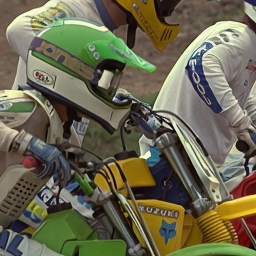

In [5]:
pil_images[0]

In [6]:
image_tokens[0].shape

torch.Size([1, 4, 64, 64])

In [7]:
(8*3*image.width*image.height)/(32*4*128*192)

0.5